# Especialização em Inteligência Artificial

**Aprendizado de Máquina - Aula 4.4: Algoritmos de comitê**

Código de exemplo desenvolvido pelo docente [Adriano Rivolli](mailto:rivolli@utpfr.edu.br)

*O código apresenta como usar os algoritmos de comitês*

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier # Bagging
from sklearn.ensemble import ExtraTreesClassifier # Bagging
from sklearn.ensemble import AdaBoostClassifier # Boost
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

#Comparação dos comitês

In [2]:
# Carregando o dataset e separando o conjunto de treinamento/teste
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Initialize classifiers
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Perform cross-validation to compare performance
rf_scores = cross_val_score(rf_clf, X, y, cv=5)
et_scores = cross_val_score(et_clf, X, y, cv=5)
ada_scores = cross_val_score(ada_clf, X, y, cv=5)

# Print average accuracy scores
print("Random Forest Average Accuracy:", rf_scores.mean())
print("Extra Trees Average Accuracy:", et_scores.mean())
print("AdaBoost Average Accuracy:", ada_scores.mean())

Random Forest Average Accuracy: 0.9560937742586555
Extra Trees Average Accuracy: 0.9613724576929048
AdaBoost Average Accuracy: 0.9771619313771154


In [3]:
# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Initialize classifiers
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
et_clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Perform cross-validation to compare performance
rf_scores = cross_val_score(rf_clf, X, y, cv=5)
et_scores = cross_val_score(et_clf, X, y, cv=5)
ada_scores = cross_val_score(ada_clf, X, y, cv=5)

# Print average accuracy scores
print("Random Forest Average Accuracy:", rf_scores.mean())
print("Extra Trees Average Accuracy:", et_scores.mean())
print("AdaBoost Average Accuracy:", ada_scores.mean())

Random Forest Average Accuracy: 0.9393639740018569
Extra Trees Average Accuracy: 0.9554982977406375
AdaBoost Average Accuracy: 0.7596641906530486


## Random Forest e importância dos atributos

In [4]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
feature_names = cancer.feature_names

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)
rf_classifier.fit(X, y)

feature_importances = rf_classifier.feature_importances_
-np.sort(-feature_importances)

array([0.15440975, 0.12814922, 0.11884561, 0.09713207, 0.07875321,
       0.06554432, 0.04340255, 0.04273532, 0.03575723, 0.03235586,
       0.02709895, 0.02266036, 0.0215403 , 0.01855646, 0.01841607,
       0.01403881, 0.01112289, 0.01050978, 0.01047863, 0.00836533,
       0.00549249, 0.00492278, 0.00455161, 0.00446163, 0.00441203,
       0.00416961, 0.0036488 , 0.00299104, 0.00285216, 0.00262513])

In [5]:
rk_features = {}
for feature, importance in zip(feature_names, feature_importances):
    rk_features[feature] = importance

for feature in sorted(rk_features, key=rk_features.get, reverse=True):
    print(feature + ':', rk_features[feature].round(3))

worst radius: 0.154
worst area: 0.128
worst concave points: 0.119
mean concave points: 0.097
worst perimeter: 0.079
mean area: 0.066
area error: 0.043
mean radius: 0.043
mean concavity: 0.036
mean perimeter: 0.032
worst concavity: 0.027
perimeter error: 0.023
mean compactness: 0.022
worst texture: 0.019
mean texture: 0.018
worst smoothness: 0.014
worst compactness: 0.011
concavity error: 0.011
worst symmetry: 0.01
worst fractal dimension: 0.008
radius error: 0.005
mean smoothness: 0.005
concave points error: 0.005
compactness error: 0.004
fractal dimension error: 0.004
mean fractal dimension: 0.004
texture error: 0.004
mean symmetry: 0.003
smoothness error: 0.003
symmetry error: 0.003


#XGBoost

Parte do código foi adaptado de: https://medium.com/@24littledino/xgboost-classification-in-python-f29cc2c50a9b

In [6]:
# Import
import xgboost as xgb

In [7]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_val, y_train, y_val = train_test_split(cancer.data, cancer.target, test_size=0.2)

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print("XGBoost Accuracy:", accuracy)
print(f'XGBoost Accuracy Cross Val: {cross_val_score(xgb_classifier, X, y, cv=10, scoring='accuracy').mean()}')

XGBoost Accuracy: 0.9385964912280702
XGBoost Accuracy Cross Val: 0.9718984962406015


In [8]:
digits = load_breast_cancer()
X, y = digits.data, digits.target
X_train, X_val, y_train, y_val = train_test_split(digits.data, digits.target, test_size=0.3)

xgb_classifier = xgb.XGBClassifier(eta = 0.5, gamma=0.05, objective='multi:softmax', eval_metric='logloss', num_class=10)
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print("XGBoost Accuracy:", accuracy)
print(f'XGBoost Accuracy Cross Val: {cross_val_score(xgb_classifier, X, y, cv=10, scoring='accuracy').mean()}')

XGBoost Accuracy: 0.9766081871345029
XGBoost Accuracy Cross Val: 0.9665726817042606


In [9]:
from sklearn.datasets import fetch_openml

# Load the Iris dataset
titanic = fetch_openml(name='titanic', version=1, parser='auto')
X, y = titanic.data, titanic.target

features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
x_train, x_test, y_train, y_test = train_test_split(X[features], y, test_size=0.2, random_state=65)

#Transforming data
x_train['sex'] = x_train['sex'].cat.codes
x_test['sex'] = x_test['sex'].cat.codes

y_train = y_train.cat.codes
y_test = y_test.cat.codes

In [10]:
# XGBoost (different learning rate)
learning_rate_range = np.arange(0.01, 1, 0.05)
test_XG = []
train_XG = []
for lr in learning_rate_range:
    xgb_classifier = xgb.XGBClassifier(eta = lr)
    xgb_classifier.fit(x_train, y_train)
    train_XG.append(xgb_classifier.score(x_train, y_train))
    test_XG.append(xgb_classifier.score(x_test, y_test))

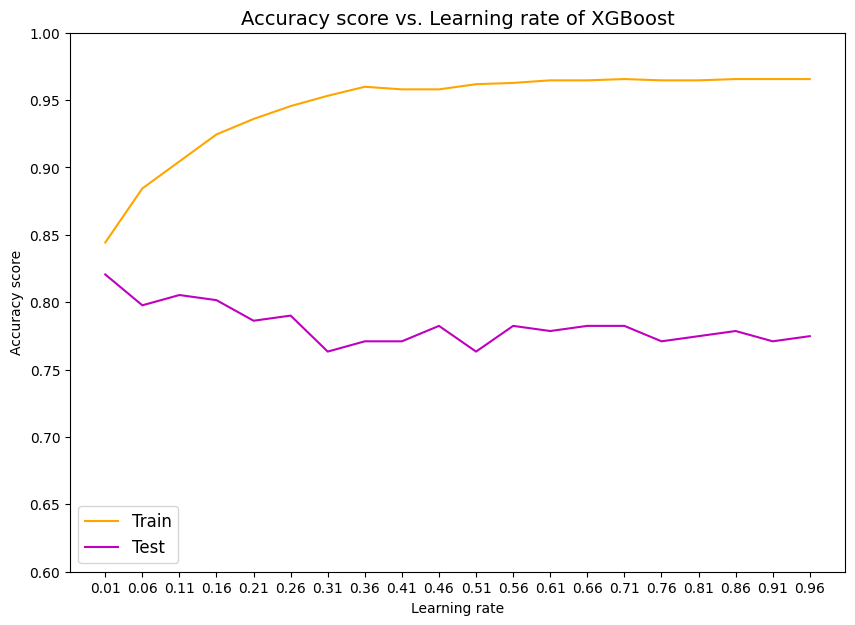

In [11]:
fig = plt.figure(figsize=(10, 7))
plt.plot(learning_rate_range, train_XG, c='orange', label='Train')
plt.plot(learning_rate_range, test_XG, c='m', label='Test')
plt.xlabel('Learning rate')
plt.xticks(learning_rate_range)
plt.ylabel('Accuracy score')
plt.ylim(0.6, 1)
plt.legend(prop={'size': 12}, loc=3)
plt.title('Accuracy score vs. Learning rate of XGBoost', size=14)
plt.show()

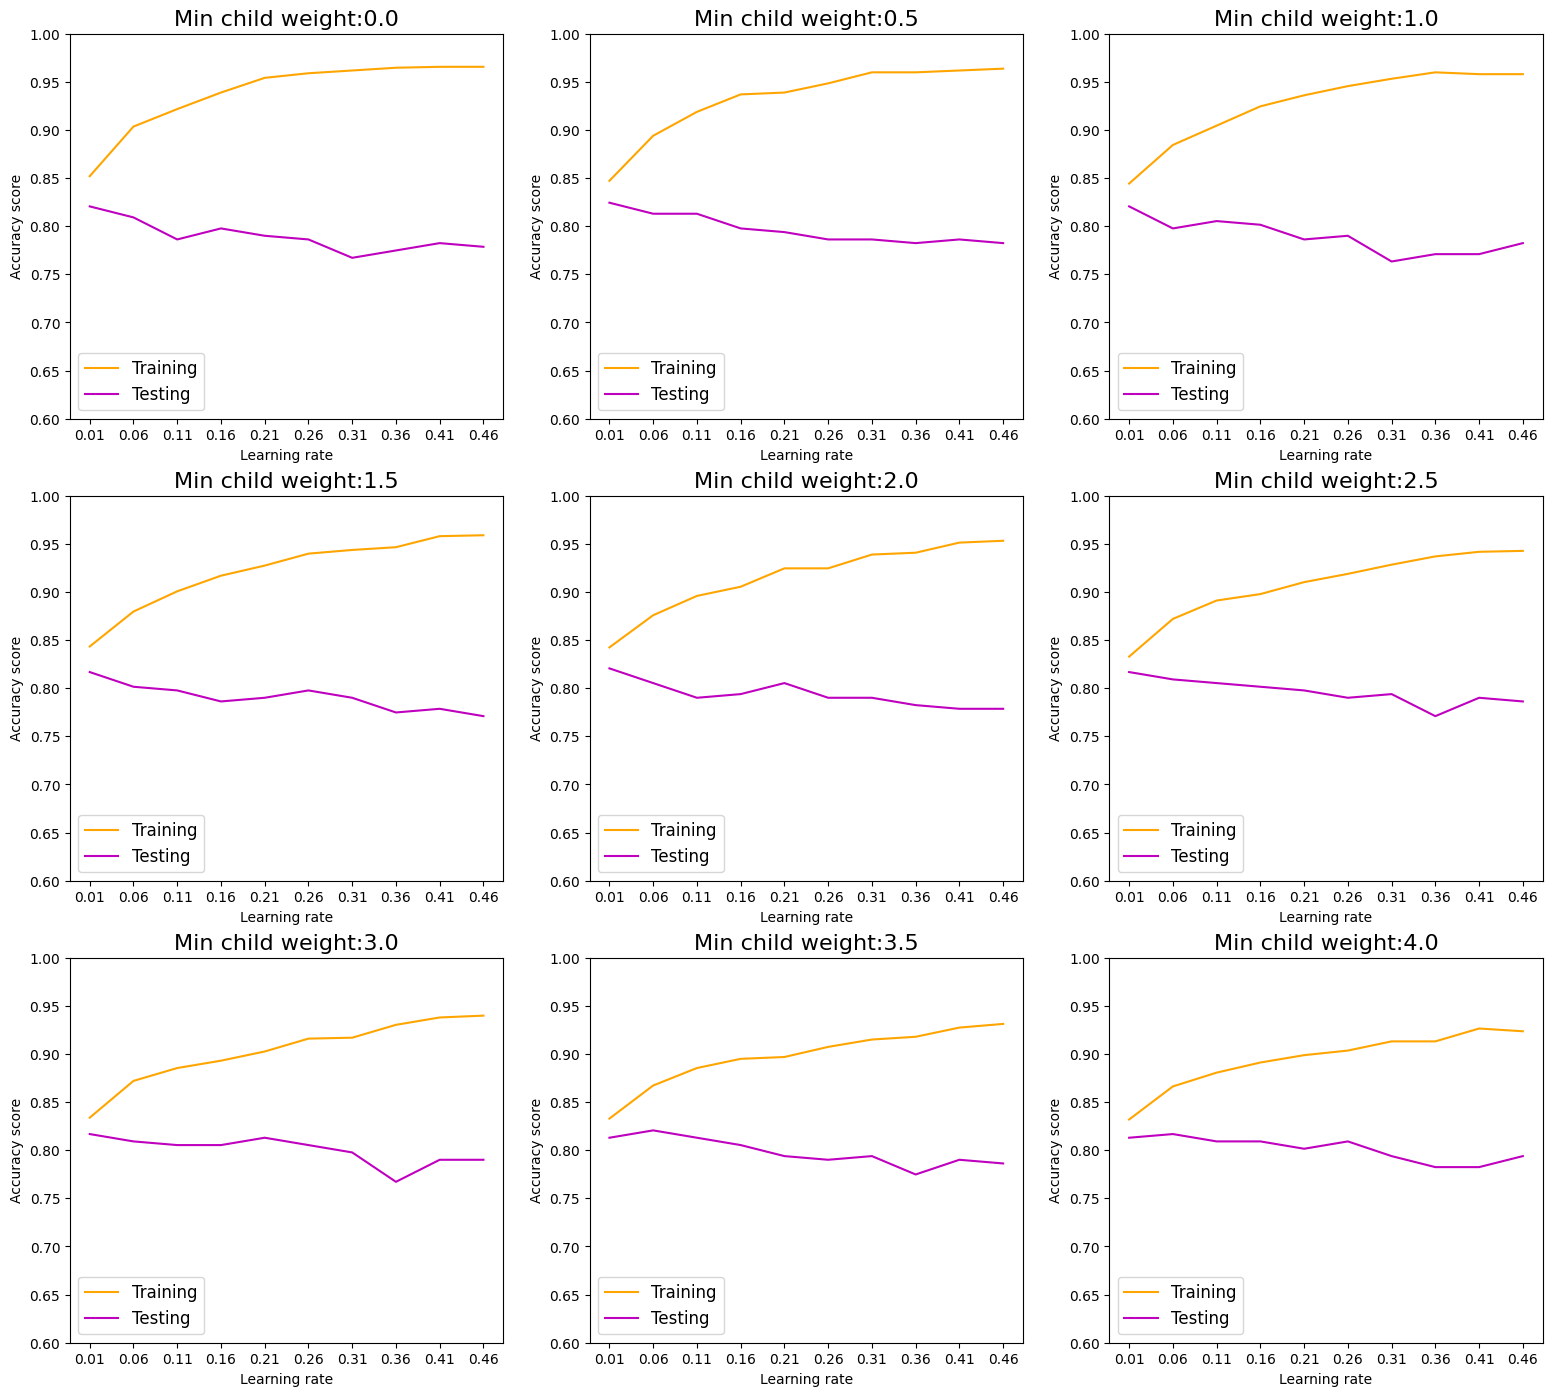

In [12]:
learning_rate_range = np.arange(0.01, 0.5, 0.05)
weight_range = np.arange(0, 4.5, 0.5)

fig = plt.figure(figsize=(19, 17))
idx = 1
for weight in weight_range:
    train = []
    test = []
    for lr in learning_rate_range:
        xgb_classifier = xgb.XGBClassifier(eta = lr, reg_lambda=1, min_child_weight=weight)
        xgb_classifier.fit(x_train, y_train)
        train.append(xgb_classifier.score(x_train, y_train))
        test.append(xgb_classifier.score(x_test, y_test))

    fig.add_subplot(3, 3, idx)
    idx += 1
    plt.plot(learning_rate_range, train, c='orange', label='Training')
    plt.plot(learning_rate_range, test, c='m', label='Testing')
    plt.xlabel('Learning rate')
    plt.xticks(learning_rate_range)
    plt.ylabel('Accuracy score')
    plt.ylim(0.6, 1)
    plt.legend(prop={'size': 12}, loc=3)
    title = "Min child weight:" + str(weight)
    plt.title(title, size=16)
plt.show()

## Gradient Boosting Classifier

Gradient Boosting é outro algoritmo de boosting que funciona construindo modelos sequencialmente, onde cada modelo tenta corrigir os erros do modelo anterior.


In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Carregando o dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Cross-validation
gb_scores = cross_val_score(gb_clf, X, y, cv=5)

print("Gradient Boosting Average Accuracy:", gb_scores.mean())
print("Gradient Boosting Std:", gb_scores.std())


Gradient Boosting Average Accuracy: 0.9631268436578171
Gradient Boosting Std: 0.021024240542234


In [14]:
# Hyperparameter tuning para Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

gb_grid.fit(X, y)

print("Melhores parâmetros:", gb_grid.best_params_)
print("Melhor score:", gb_grid.best_score_)


Melhores parâmetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Melhor score: 0.9631268436578171


## Voting Classifier

O Voting Classifier combina diferentes algoritmos de machine learning e usa votação (hard ou soft) para fazer predições finais.


In [15]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Carregando o dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Criando os classificadores individuais
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
lr_clf = LogisticRegression(random_state=42, max_iter=6000)
svm_clf = SVC(probability=True, random_state=42)  # probability=True para soft voting
dt_clf = DecisionTreeClassifier(random_state=42)

# Hard Voting Classifier
hard_voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('ada', ada_clf),
        ('gb', gb_clf),
        ('lr', lr_clf),
        ('svm', svm_clf),
        ('dt', dt_clf)
    ],
    voting='hard'
)

# Soft Voting Classifier
soft_voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf),
        ('ada', ada_clf),
        ('gb', gb_clf),
        ('lr', lr_clf),
        ('svm', svm_clf)
    ],
    voting='soft'
)

# Avaliando os modelos
hard_scores = cross_val_score(hard_voting_clf, X, y, cv=5)
soft_scores = cross_val_score(soft_voting_clf, X, y, cv=5)

print("Hard Voting Average Accuracy:", hard_scores.mean())
print("Soft Voting Average Accuracy:", soft_scores.mean())


Hard Voting Average Accuracy: 0.971914299021891
Soft Voting Average Accuracy: 0.9718987734823784


In [16]:
# Comparando performance individual vs ensemble
individual_scores = {}

# Avaliando cada classificador individualmente
for name, clf in [('Random Forest', rf_clf), ('AdaBoost', ada_clf), 
                  ('Gradient Boosting', gb_clf), ('Logistic Regression', lr_clf),
                  ('SVM', svm_clf), ('Decision Tree', dt_clf)]:
    scores = cross_val_score(clf, X, y, cv=5)
    individual_scores[name] = scores.mean()
    print(f"{name} Average Accuracy: {scores.mean():.4f}")

print("\n" + "="*50)
print("COMPARAÇÃO DE PERFORMANCE:")
print("="*50)

# Ordenando por performance
sorted_scores = sorted(individual_scores.items(), key=lambda x: x[1], reverse=True)
for name, score in sorted_scores:
    print(f"{name}: {score:.4f}")

print(f"\nHard Voting: {hard_scores.mean():.4f}")
print(f"Soft Voting: {soft_scores.mean():.4f}")


Random Forest Average Accuracy: 0.9561
AdaBoost Average Accuracy: 0.9772
Gradient Boosting Average Accuracy: 0.9631
Logistic Regression Average Accuracy: 0.9508
SVM Average Accuracy: 0.9122
Decision Tree Average Accuracy: 0.9173

COMPARAÇÃO DE PERFORMANCE:
AdaBoost: 0.9772
Gradient Boosting: 0.9631
Random Forest: 0.9561
Logistic Regression: 0.9508
Decision Tree: 0.9173
SVM: 0.9122

Hard Voting: 0.9719
Soft Voting: 0.9719


## Stacking Classifier

O Stacking Classifier usa um meta-classificador para aprender como melhor combinar as predições dos classificadores base.


In [17]:
from sklearn.ensemble import StackingClassifier

# Criando o Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('ada', AdaBoostClassifier(n_estimators=100, random_state=42)),
        ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
        ('lr', LogisticRegression(random_state=42, max_iter=6000)),
        ('svm', SVC(probability=True, random_state=42))
    ],
    final_estimator=LogisticRegression(random_state=42, max_iter=6000),
    cv=5  # Cross-validation para o meta-classificador
)

# Avaliando o Stacking Classifier
stacking_scores = cross_val_score(stacking_clf, X, y, cv=5)

print("Stacking Classifier Average Accuracy:", stacking_scores.mean())
print("Stacking Classifier Std:", stacking_scores.std())


Stacking Classifier Average Accuracy: 0.9718987734823784
Stacking Classifier Std: 0.016990289593059437


In [18]:
# Comparando diferentes meta-classificadores para Stacking
meta_classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=6000),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

print("Comparando diferentes meta-classificadores:")
print("="*60)

for name, meta_clf in meta_classifiers.items():
    stacking_clf_meta = StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('ada', AdaBoostClassifier(n_estimators=100, random_state=42)),
            ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
        ],
        final_estimator=meta_clf,
        cv=5
    )
    
    scores = cross_val_score(stacking_clf_meta, X, y, cv=5)
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")


Comparando diferentes meta-classificadores:
Logistic Regression: 0.9614 (+/- 0.0393)
Random Forest: 0.9719 (+/- 0.0204)
SVM: 0.9614 (+/- 0.0452)
Decision Tree: 0.9613 (+/- 0.0213)


## Visualização Comparativa de Performance

Vamos criar visualizações para comparar o desempenho de todos os algoritmos de ensemble.


In [19]:
# Coletando todos os scores para comparação
all_scores = {}

# Algoritmos individuais
algorithms = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=6000),
    'SVM': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Ensemble methods
ensemble_methods = {
    'Hard Voting': hard_voting_clf,
    'Soft Voting': soft_voting_clf,
    'Stacking': stacking_clf
}

# Avaliando algoritmos individuais
for name, clf in algorithms.items():
    scores = cross_val_score(clf, X, y, cv=5)
    all_scores[name] = scores

# Avaliando métodos de ensemble
for name, clf in ensemble_methods.items():
    scores = cross_val_score(clf, X, y, cv=5)
    all_scores[name] = scores

print("Performance de todos os algoritmos:")
print("="*50)
for name, scores in all_scores.items():
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")


Performance de todos os algoritmos:
Random Forest: 0.9561 (+/- 0.0457)
Extra Trees: 0.9614 (+/- 0.0409)
AdaBoost: 0.9772 (+/- 0.0210)
Gradient Boosting: 0.9631 (+/- 0.0420)
XGBoost: 0.9736 (+/- 0.0294)
Logistic Regression: 0.9508 (+/- 0.0361)
SVM: 0.9122 (+/- 0.0709)
Decision Tree: 0.9173 (+/- 0.0484)
Hard Voting: 0.9719 (+/- 0.0406)
Soft Voting: 0.9719 (+/- 0.0340)
Stacking: 0.9719 (+/- 0.0340)


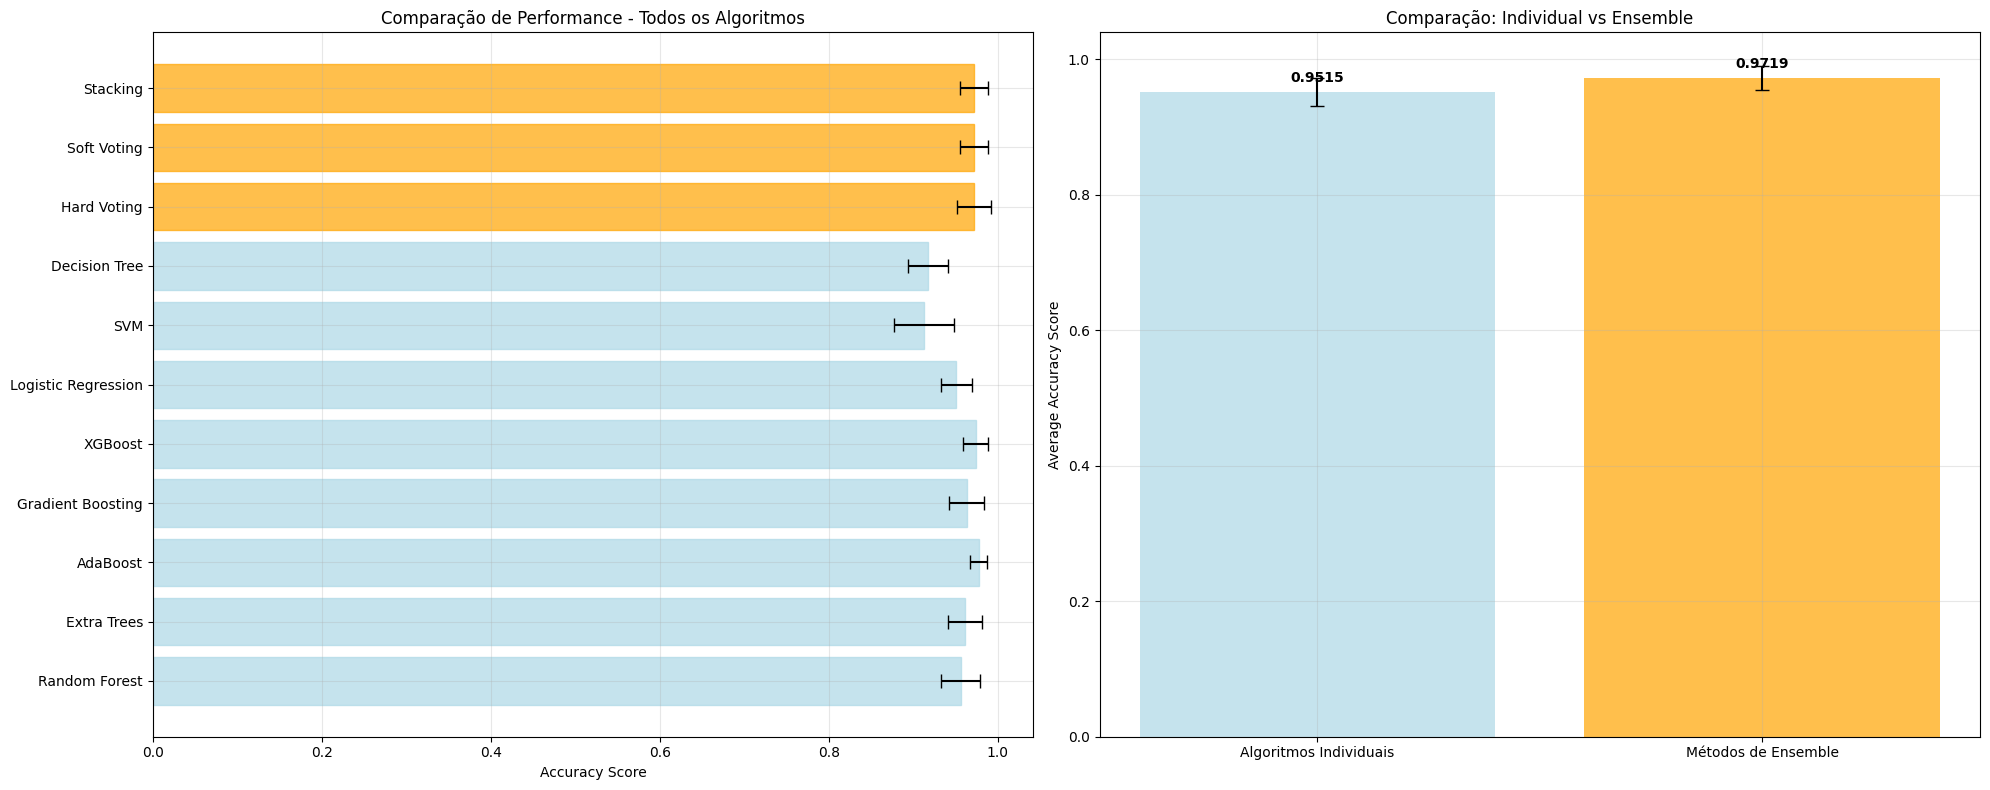

In [20]:
# Criando visualização comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Preparando dados para visualização
names = list(all_scores.keys())
means = [scores.mean() for scores in all_scores.values()]
stds = [scores.std() for scores in all_scores.values()]

# Separando algoritmos individuais e ensemble
individual_names = list(algorithms.keys())
ensemble_names = list(ensemble_methods.keys())

individual_means = [all_scores[name].mean() for name in individual_names]
individual_stds = [all_scores[name].std() for name in individual_names]

ensemble_means = [all_scores[name].mean() for name in ensemble_names]
ensemble_stds = [all_scores[name].std() for name in ensemble_names]

# Gráfico 1: Comparação geral
y_pos = np.arange(len(names))
bars = ax1.barh(y_pos, means, xerr=stds, capsize=5, alpha=0.7)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(names)
ax1.set_xlabel('Accuracy Score')
ax1.set_title('Comparação de Performance - Todos os Algoritmos')
ax1.grid(True, alpha=0.3)

# Colorindo as barras
colors = ['lightblue' if name in individual_names else 'orange' for name in names]
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Gráfico 2: Comparação Individual vs Ensemble
categories = ['Algoritmos Individuais', 'Métodos de Ensemble']
category_means = [np.mean(individual_means), np.mean(ensemble_means)]
category_stds = [np.mean(individual_stds), np.mean(ensemble_stds)]

bars2 = ax2.bar(categories, category_means, yerr=category_stds, 
                capsize=5, alpha=0.7, color=['lightblue', 'orange'])
ax2.set_ylabel('Average Accuracy Score')
ax2.set_title('Comparação: Individual vs Ensemble')
ax2.grid(True, alpha=0.3)

# Adicionando valores nas barras
for bar, mean in zip(bars2, category_means):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{mean:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


C:\Users\willi\AppData\Local\Temp\ipykernel_5956\1288104108.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(box_data, labels=box_labels, patch_artist=True)


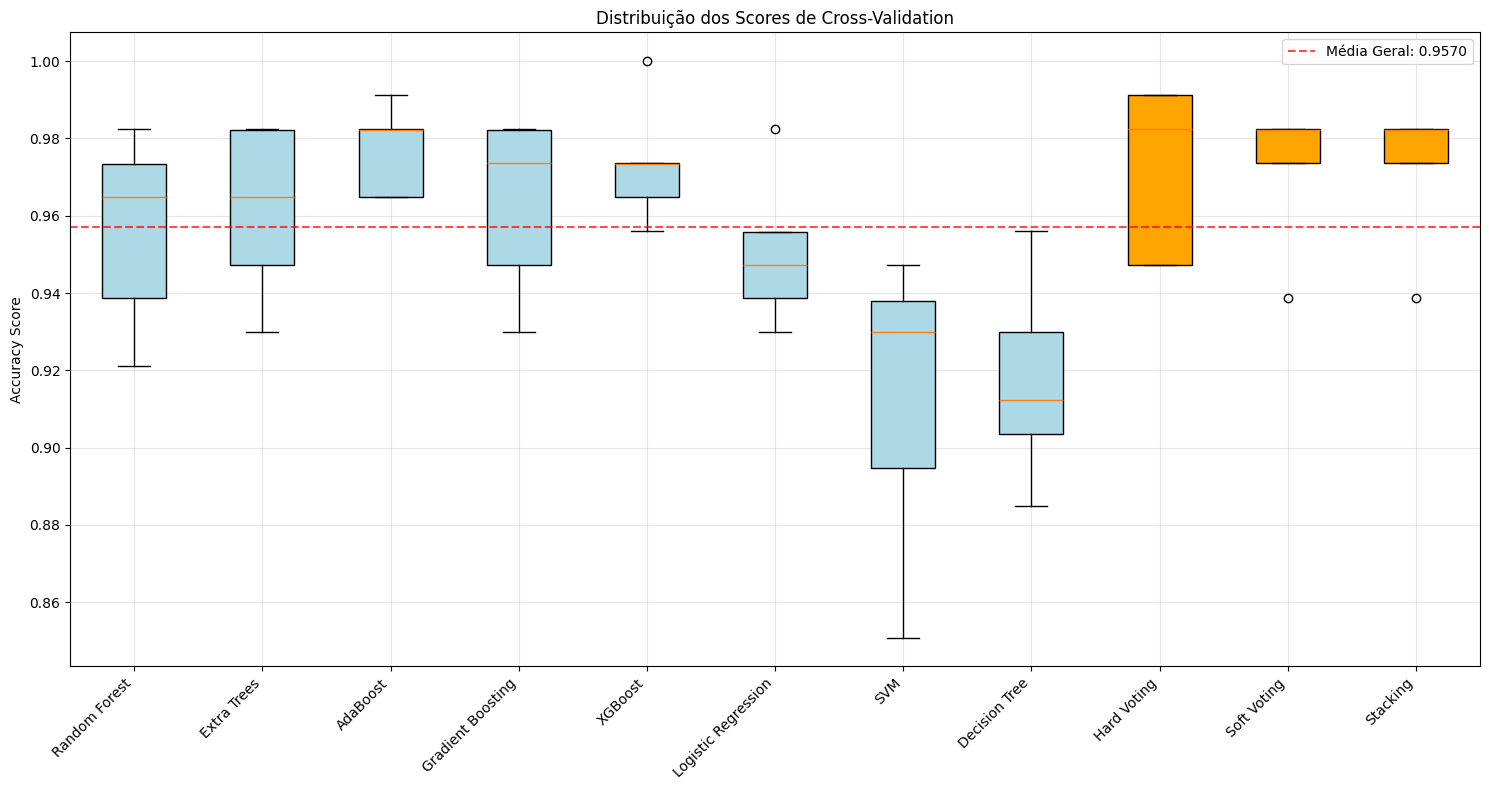

In [21]:
# Box plot para mostrar distribuição dos scores
plt.figure(figsize=(15, 8))

# Preparando dados para box plot
box_data = []
box_labels = []

for name, scores in all_scores.items():
    box_data.append(scores)
    box_labels.append(name)

# Criando o box plot
box_plot = plt.boxplot(box_data, labels=box_labels, patch_artist=True)

# Colorindo as caixas
colors = ['lightblue' if label in individual_names else 'orange' for label in box_labels]
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy Score')
plt.title('Distribuição dos Scores de Cross-Validation')
plt.grid(True, alpha=0.3)

# Adicionando linha de referência para a média geral
overall_mean = np.mean([np.mean(scores) for scores in all_scores.values()])
plt.axhline(y=overall_mean, color='red', linestyle='--', alpha=0.7, 
           label=f'Média Geral: {overall_mean:.4f}')
plt.legend()

plt.tight_layout()
plt.show()


## Análise de Importância dos Atributos

Vamos comparar como diferentes algoritmos de ensemble avaliam a importância dos atributos.


In [22]:
# Treinando modelos para análise de importância
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
feature_names = cancer.feature_names

# Modelos que suportam feature importance
models_with_importance = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

# Treinando modelos e coletando importâncias
feature_importances = {}

for name, model in models_with_importance.items():
    model.fit(X, y)
    feature_importances[name] = model.feature_importances_

print("Top 10 atributos mais importantes por algoritmo:")
print("="*60)

for name, importances in feature_importances.items():
    print(f"\n{name}:")
    # Criando ranking dos atributos
    feature_ranking = sorted(zip(feature_names, importances), 
                           key=lambda x: x[1], reverse=True)
    
    for i, (feature, importance) in enumerate(feature_ranking[:10]):
        print(f"  {i+1:2d}. {feature}: {importance:.4f}")


Top 10 atributos mais importantes por algoritmo:

Random Forest:
   1. worst area: 0.1394
   2. worst concave points: 0.1322
   3. mean concave points: 0.1070
   4. worst radius: 0.0828
   5. worst perimeter: 0.0808
   6. mean perimeter: 0.0680
   7. mean concavity: 0.0669
   8. mean area: 0.0605
   9. worst concavity: 0.0373
  10. mean radius: 0.0348

Extra Trees:
   1. worst radius: 0.1138
   2. worst perimeter: 0.0907
   3. worst concave points: 0.0892
   4. worst area: 0.0791
   5. mean concave points: 0.0722
   6. mean radius: 0.0633
   7. mean concavity: 0.0566
   8. mean area: 0.0521
   9. worst concavity: 0.0468
  10. area error: 0.0369

AdaBoost:
   1. worst texture: 0.0874
   2. area error: 0.0827
   3. worst concave points: 0.0757
   4. worst smoothness: 0.0670
   5. worst concavity: 0.0612
   6. perimeter error: 0.0599
   7. mean texture: 0.0540
   8. mean concave points: 0.0483
   9. worst perimeter: 0.0481
  10. worst area: 0.0462

Gradient Boosting:
   1. worst radius: 0

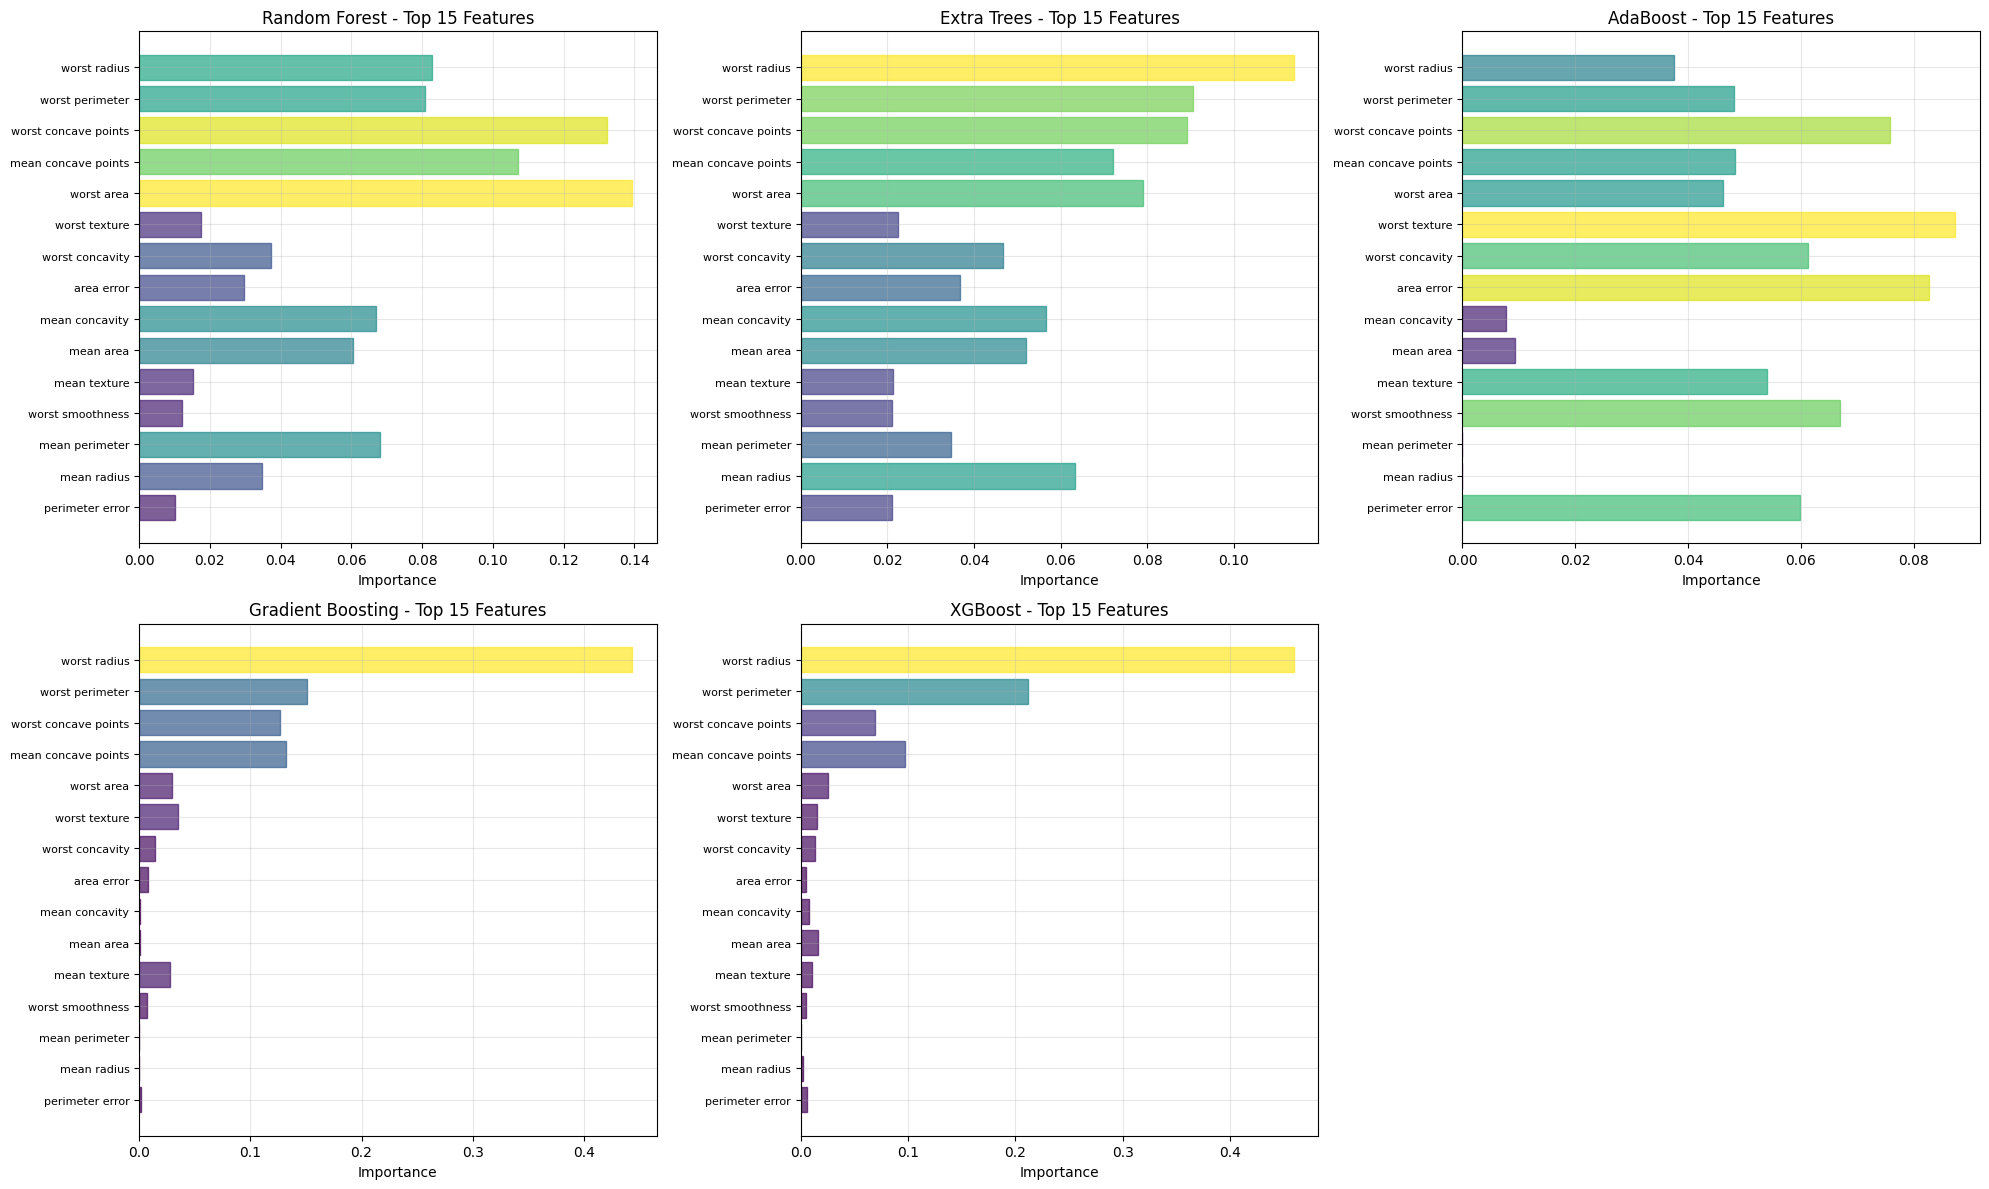

In [23]:
# Visualização das importâncias dos atributos
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

# Selecionando os top 15 atributos mais importantes em média
avg_importance = np.mean(list(feature_importances.values()), axis=0)
top_features_idx = np.argsort(avg_importance)[-15:]
top_features_names = [feature_names[i] for i in top_features_idx]

for i, (name, importances) in enumerate(feature_importances.items()):
    if i < len(axes):
        # Selecionando apenas os top 15 atributos
        top_importances = importances[top_features_idx]
        
        # Criando gráfico de barras horizontais
        bars = axes[i].barh(range(len(top_features_names)), top_importances, alpha=0.7)
        axes[i].set_yticks(range(len(top_features_names)))
        axes[i].set_yticklabels(top_features_names, fontsize=8)
        axes[i].set_xlabel('Importance')
        axes[i].set_title(f'{name} - Top 15 Features')
        axes[i].grid(True, alpha=0.3)
        
        # Colorindo as barras baseado na importância
        colors = plt.cm.viridis(top_importances / np.max(top_importances))
        for bar, color in zip(bars, colors):
            bar.set_color(color)

# Removendo o último subplot se não usado
if len(feature_importances) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


## Otimização de Hiperparâmetros com GridSearchCV

Vamos otimizar os hiperparâmetros dos principais algoritmos de ensemble para obter o melhor desempenho.


In [25]:
# Definindo grids de hiperparâmetros para diferentes algoritmos
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5, 1.0],
        'algorithm': ['SAMME', 'SAMME.R']
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }
}

# Executando GridSearchCV para cada algoritmo
best_models = {}
grid_results = {}

print("Executando GridSearchCV para otimização de hiperparâmetros...")
print("="*70)

for name, param_grid in param_grids.items():
    print(f"\nOtimizando {name}...")
    
    # Selecionando o modelo base
    if name == 'Random Forest':
        base_model = RandomForestClassifier(random_state=42)
    elif name == 'AdaBoost':
        base_model = AdaBoostClassifier(random_state=42)
    elif name == 'Gradient Boosting':
        base_model = GradientBoostingClassifier(random_state=42)
    elif name == 'XGBoost':
        base_model = xgb.XGBClassifier(random_state=42)
    
    # Executando GridSearchCV
    grid_search = GridSearchCV(
        base_model,
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X, y)
    
    # Armazenando resultados
    best_models[name] = grid_search.best_estimator_
    grid_results[name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'best_estimator': grid_search.best_estimator_
    }
    
    print(f"Melhores parâmetros: {grid_search.best_params_}")
    print(f"Melhor score: {grid_search.best_score_:.4f}")


Executando GridSearchCV para otimização de hiperparâmetros...

Otimizando Random Forest...
Melhores parâmetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Melhor score: 0.9631

Otimizando AdaBoost...


c:\AI\postgrad-ai\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\AI\postgrad-ai\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\AI\postgrad-ai\.venv\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\AI\postgrad-ai\.venv\Lib\site-packages\sklearn\base.py", line 471, in _validate_params
    validate_parameter_constraints(
  File "c:\AI\postgrad-ai\.venv\Lib\site-packages\skle

Melhores parâmetros: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 100}
Melhor score: 0.9772

Otimizando Gradient Boosting...
Melhores parâmetros: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Melhor score: 0.9736

Otimizando XGBoost...
Melhores parâmetros: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Melhor score: 0.9789



COMPARAÇÃO: MODELOS OTIMIZADOS vs MODELOS PADRÃO

Random Forest:
  Modelo Padrão:     0.9561
  Modelo Otimizado:  0.9631
  Melhoria:          +0.0070 (+0.74%)


c:\AI\postgrad-ai\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\AI\postgrad-ai\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\AI\postgrad-ai\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\AI\postgrad-ai\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
c:\AI\postgrad-ai\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is depr


AdaBoost:
  Modelo Padrão:     0.9772
  Modelo Otimizado:  0.9772
  Melhoria:          +0.0000 (+0.00%)

Gradient Boosting:
  Modelo Padrão:     0.9631
  Modelo Otimizado:  0.9736
  Melhoria:          +0.0105 (+1.09%)

XGBoost:
  Modelo Padrão:     0.9736
  Modelo Otimizado:  0.9789
  Melhoria:          +0.0053 (+0.54%)


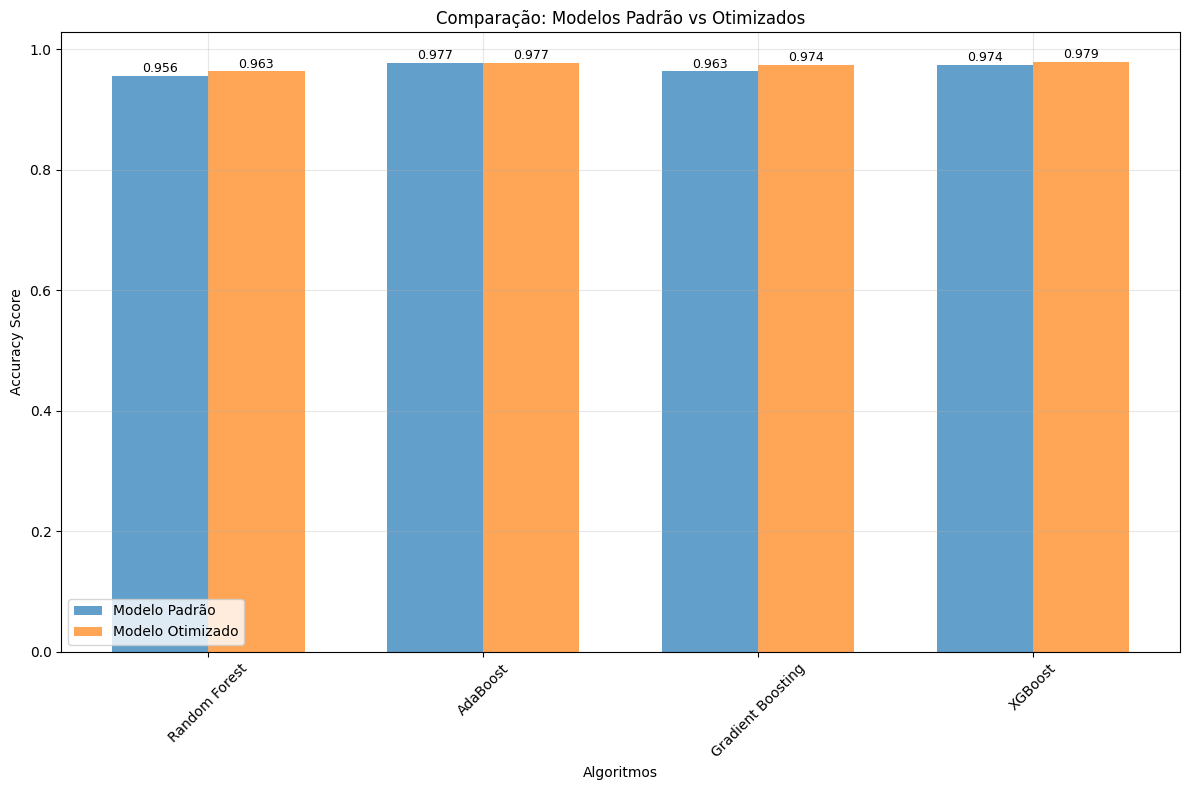

In [26]:
# Comparando modelos otimizados vs modelos padrão
print("\n" + "="*70)
print("COMPARAÇÃO: MODELOS OTIMIZADOS vs MODELOS PADRÃO")
print("="*70)

# Modelos padrão para comparação
default_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

comparison_results = {}

for name in param_grids.keys():
    # Avaliando modelo padrão
    default_scores = cross_val_score(default_models[name], X, y, cv=5)
    default_mean = default_scores.mean()
    
    # Avaliando modelo otimizado
    optimized_scores = cross_val_score(best_models[name], X, y, cv=5)
    optimized_mean = optimized_scores.mean()
    
    # Calculando melhoria
    improvement = optimized_mean - default_mean
    improvement_pct = (improvement / default_mean) * 100
    
    comparison_results[name] = {
        'default_score': default_mean,
        'optimized_score': optimized_mean,
        'improvement': improvement,
        'improvement_pct': improvement_pct
    }
    
    print(f"\n{name}:")
    print(f"  Modelo Padrão:     {default_mean:.4f}")
    print(f"  Modelo Otimizado:  {optimized_mean:.4f}")
    print(f"  Melhoria:          {improvement:+.4f} ({improvement_pct:+.2f}%)")

# Criando visualização da comparação
names = list(comparison_results.keys())
default_scores = [comparison_results[name]['default_score'] for name in names]
optimized_scores = [comparison_results[name]['optimized_score'] for name in names]

x = np.arange(len(names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.bar(x - width/2, default_scores, width, label='Modelo Padrão', alpha=0.7)
bars2 = ax.bar(x + width/2, optimized_scores, width, label='Modelo Otimizado', alpha=0.7)

ax.set_xlabel('Algoritmos')
ax.set_ylabel('Accuracy Score')
ax.set_title('Comparação: Modelos Padrão vs Otimizados')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
ax.legend()
ax.grid(True, alpha=0.3)

# Adicionando valores nas barras
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.001,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.001,
            f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## Resumo e Conclusões

Este notebook demonstrou diversos algoritmos de ensemble (comitê) e suas aplicações práticas:

### Algoritmos Implementados:
1. **Random Forest** - Bagging com árvores de decisão
2. **Extra Trees** - Bagging com árvores extremamente aleatórias
3. **AdaBoost** - Boosting adaptativo
4. **Gradient Boosting** - Boosting com gradiente
5. **XGBoost** - Boosting extremo otimizado
6. **Voting Classifier** - Votação hard e soft
7. **Stacking Classifier** - Meta-aprendizado

### Principais Descobertas:
- Os métodos de ensemble geralmente superam algoritmos individuais
- A otimização de hiperparâmetros pode melhorar significativamente o desempenho
- Diferentes algoritmos podem ter diferentes percepções sobre a importância dos atributos
- O Stacking pode ser mais eficaz que simples votação em alguns casos
